This notebook is a simple exercise depicting a basic K-Means clustering using simple customer data against some features like income and spend.

 Import Libraries

In [42]:
import pandas as pd
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

Exploratory Data Analysis. EDA 

In [60]:
data = pd.read_csv(r'Mall_customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.datasets import make_blobs

n_clusters = 3

# creating an example dataset with data clustered into n_clusters

X_practice, y = make_blobs(
   n_samples=150, n_features=2,
   centers=n_clusters,
   # Try increasing and decreasing this number and see how the clusters and
   # algorithm are affected
   cluster_std=0.5,
   shuffle=False, random_state=0
)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure

output_notebook()

data_plot = figure()

# Grab our two feature columns and plot them so we can see the clustered pattern
# of the data
x1 = X_practice[:, 0]
x2 = X_practice[:, 1]
data_plot.circle(x=x1, y=x2)

show(data_plot)

Loading BokehJS ...

In [ ]:
import numpy as np

# Create initial locations for centroids
init = np.array([[10, 2],
                 [-10, 3],
                 [1, -3]])
# A possible solution for initializing any number of clusters
# init = np.random.randint(low=-20, high=21, size=(n_clusters, 2)))

# Add the centroid coordinates to the plot
data_plot.scatter(init[:, 0], init[:, 1], marker='x', size=20, color='red')

show(data_plot)

Basic KMeans Example with SKLearn The minimum steps required to run KMeans on our data are:

-Gather numeric data to cluster (KMeans isn't designed for categorical data)
-Create a KMeans object
-Call fit on the KMeans object with our numeric data as an argument

In [ ]:
customers = pd.read_csv('Mall_Customers.csv', header=0,
                        names=['id', 'gender', 'age', 'annual_income', 'spending_score'],
                        index_col='id')
customers.head()

,gender,age,annual_income,spending_score
id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Visualizations

In [ ]:
customers.drop(labels='gender', axis=1).agg(['mean', 'min', 'max'])


,age,annual_income,spending_score
mean,38.85,60.56,50.2
min,18.00,15.00,1.0
max,70.00,137.00,99.0


In [ ]:
customers['gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: xlabel='gender'>

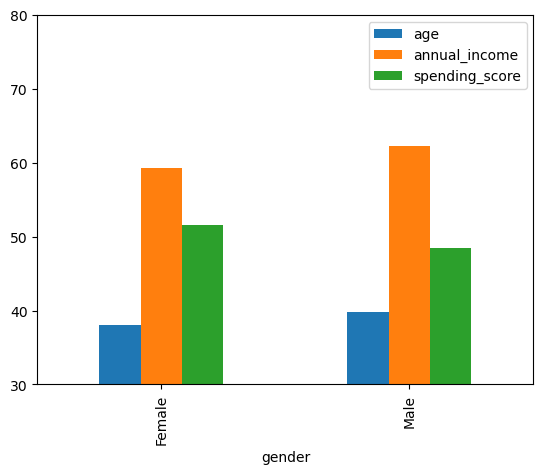

In [ ]:
customers.groupby('gender').mean().plot.bar(ylim=(30, 80))

gender
Female    112
Male       88
Name: count, dtype: int64


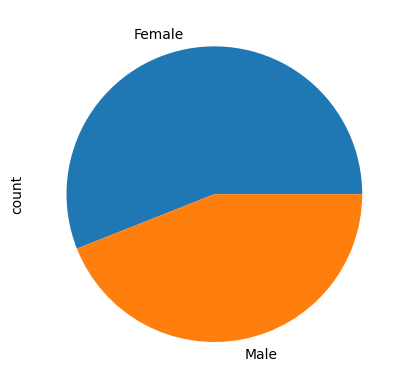

In [ ]:
counts = customers['gender'].value_counts()
counts.plot.pie()
print(counts)

gender
Female    112
Male       88
Name: count, dtype: int64


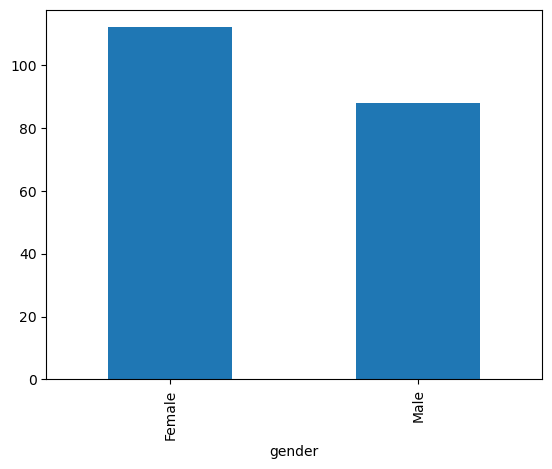

In [ ]:
counts = customers['gender'].value_counts()
counts.plot.bar()
print(counts)

In [ ]:
customers.head()

,gender,age,annual_income,spending_score
id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

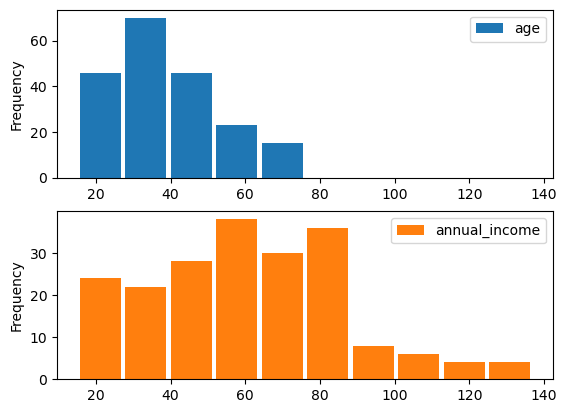

In [ ]:
customers[['age', 'annual_income']].plot.hist(subplots=True, rwidth=0.9, sharex=False)

The graph above shows that our data has an age distrubution between 18 and 80. The highest age group is in the 30s and the frequecy decreases as the age gets older.  We can also see that only a few people have a higher income and the highest incone group in around 60 k


Fit the K means object on the numerical data

In [ ]:
from sklearn.cluster import KMeans

num_cols = ['age', 'annual_income', 'spending_score']
X = customers[num_cols]
kmeans = KMeans()
kmeans.fit(X)

KMeans()

In [ ]:
# lets view the cluster centers.  the cluster coordinates are 3-dimensional just like our data
print(kmeans.cluster_centers_)

[[ 27.10810811  56.2972973   49.67567568]
 [ 32.86206897  78.55172414  82.17241379]
 [ 41.         109.7         22.        ]
 [ 56.15555556  53.37777778  49.08888889]
 [ 25.27272727  25.72727273  79.36363636]
 [ 41.23076923  79.26923077  15.92307692]
 [ 44.14285714  25.14285714  19.52380952]
 [ 32.2        109.7         82.        ]]


In [ ]:
# Now to prit out the group number for each customer in our dataset
print(kmeans.predict(X))

[6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6 4 6
 4 6 4 3 4 3 0 6 4 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 5 1 5 1 5 1 5 1 0 1 5 1 5 1 5 1 5 1 0 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 2 7 2 7 2
 7 2 7 2 7 2 7 2 7 2 7 2 7 2 7]


In [ ]:
### Printing inertia to test out performance.

kmeans.inertia_

44307.873416704446

Because the inertia is quite high , it means the distance from the centroid of each cluster is very far from the samples, it means there are curretly no clear groupings. Hence the need for feature scaling in Unsupervised learning problems

### Preprocessing

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

sklearn.set_config(display='diagram')

In [ ]:
print(customers[:5])
scaler = StandardScaler()


    gender  age  annual_income  spending_score
id                                            
1     Male   19             15              39
2     Male   21             15              81
3   Female   20             16               6
4   Female   23             16              77
5   Female   31             17              40


In [ ]:
len(customers)

200

In [ ]:
#numcols are the numerical cols that needs to be scaled
preprocesser = make_column_transformer((scaler, num_cols))
print(preprocesser.fit_transform(customers)[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [ ]:
#  random state is set to 0  here to make sure the results are reproducible; this can be varied in real life
kmeans = make_pipeline(preprocesser, KMeans(random_state=0))
kmeans

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'spending_score'])])),
                ('kmeans', KMeans(random_state=0))])

In [ ]:
kmeans.fit(customers)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'spending_score'])])),
                ('kmeans', KMeans(random_state=0))])

In [ ]:
kmeans.named_steps['kmeans'].inertia_

103.9442363296738

We can see that the value of the inertia has drastically dropped after we scaled the features.

### Finding K - Elbow method

In [ ]:
inertias = []
# We'll test k from 1 through 10
k_vals = list(range(1, 10))

# Get the inertia of our model at each k value
for k in k_vals:
    # We can change the parameters of steps within our pipeline using the name of
    # the step (kmeans) followed by two underscores and the parameter name
    kmeans.set_params(kmeans__n_clusters=k)
    kmeans.fit(customers)
    inertias.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the inertias at each value of k
elbow = figure(title='Customer KMeans Elbow Method', x_axis_label='k', y_axis_label='Inertia')
elbow.circle(k_vals, inertias)
elbow.line(k_vals, inertias)
show(elbow)


As we increase the number of clusters, the inertia always decreases . 
We can also see that there is a significant decrease in the change of inertia right at  k=4 ,, so for now we will take 4 as our K value

There are other methods to optimize thos graph to get the perfect elbow curve whch will be tried later


In [52]:
optimal_k = 4
kmeans.set_params(kmeans__n_clusters=optimal_k)
kmeans.fit(customers)
print('Inertia:\t\t', kmeans.named_steps['kmeans'].inertia_)

Inertia:		 205.2251474767592


In [53]:
from bokeh.plotting import figure, show
from bokeh.palettes import Colorblind

In [54]:
# Create a new column containing each customer's assigned segment
customers['category'] = kmeans.fit_predict(customers)
# Get the segments labels and sort them for easier visual processing in the plot
segments = customers['category'].unique()
segments.sort()

segments_fig = figure(title='Customer Segments | Annual Income and Spending Score',
                    x_axis_label='Annual Income', y_axis_label='Spending Score')
palette = Colorblind[len(segments)]

# Gather x and y data
income = customers['annual_income']
spend = customers['spending_score']

for i, segment in enumerate(segments):
  # Get the positions of the customers in this segment
  indices = customers['category'] == segment
  segments_fig.scatter(income[indices], spend[indices], color=palette[i], legend_label=('Segment ' + str(segment)))

show(segments_fig)

In [55]:
# plotting age against either annual income or spend score using the same clusters as before. Try to interpret the plot.
customers.head()

,gender,age,annual_income,spending_score,category
id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1


In [57]:
## Plottng age agianst spend


segments_fig = figure(title='Customer Segments | Annual Income and age',
                    x_axis_label='Annual Income', y_axis_label='Age')
palette = Colorblind[len(segments)]

# Gather x and y data
income = customers['annual_income']
age = customers['age']

for i, segment in enumerate(segments):
  # Get the positions of the customers in this segment
  indices = customers['category'] == segment
  segments_fig.scatter(income[indices], age[indices], color=palette[i], legend_label=('Segment ' + str(segment)))

show(segments_fig)

In [58]:


segments_fig = figure(title='Customer Segments | Annual Spend and age',
                    x_axis_label='Annual Spend', y_axis_label='Age')
palette = Colorblind[len(segments)]

# Gather x and y data
spend = customers['spending_score']
age = customers['age']

for i, segment in enumerate(segments):
  # Get the positions of the customers in this segment
  indices = customers['category'] == segment
  segments_fig.scatter(spend[indices], age[indices], color=palette[i], legend_label=('Segment ' + str(segment)))

show(segments_fig)